<a href="https://colab.research.google.com/github/scollins26/myDATA2000/blob/main/exams/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA-2000 Final Exam

## Grading Rubric

This final will be worth 15% of your total grade for this course. It will be graded out of 50 points, divided into 4 sections:

  - Model Building: 25 points
    - 15 points will be awarded for the actual model building (evaluating your Python code)
    - 10 points will be awarded for the text commentary narrating your choices and explaining your rationale
  - Model Validation/Evaluation: 25 points
    - 5 points will be awarded by default, but may be subtracted from if there are substantial errors in your model building that negatively impact the validity of your model
    - 10 points will be awarded for the actual model validation and evaluation (evaluating your Python code)
    - 10 points will be awarded for the text commentary narrating your choices and explaining your rationale

> **NOTE:** You will NOT be evaluated on whether you model actually makes accurate predictions or not

## Using Additional Resources

This is an open-resource exam. You may use any available resources as references. I will be available for any questions that you have during the exam.

Remember that all work must still be your own, and that this exam is governed by the [Policy on Academic Honesty outlined in our course syllabus](https://docs.google.com/document/d/1Aoh7LvTKTEZO74eOsNhLzorkLtljkuchpg3ScNM_VEs/edit#heading=h.r0b18a8gh450).

-----

# Image Classification: Horse or Human


For this exercise, we are going to use a dataset of images of both horses and humans, taken from [TensorFlow Datasets](https://www.tensorflow.org/datasets/catalog/horses_or_humans).

Our dataset contains 1,027 training images (300x300 pixels in full color) and 256 testing images, as well as a category label for each image.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

## Importing the Data

First, let's download our dataset and take a look at what it contains:

In [2]:
X_train, y_train = tfds.load(
    'horses_or_humans',
    split='train',
    shuffle_files=True,
    as_supervised=True,
    batch_size=-1)
X_test, y_test = tfds.load(
    'horses_or_humans',
    split='test',
    shuffle_files=True,
    as_supervised=True,
    batch_size=-1)

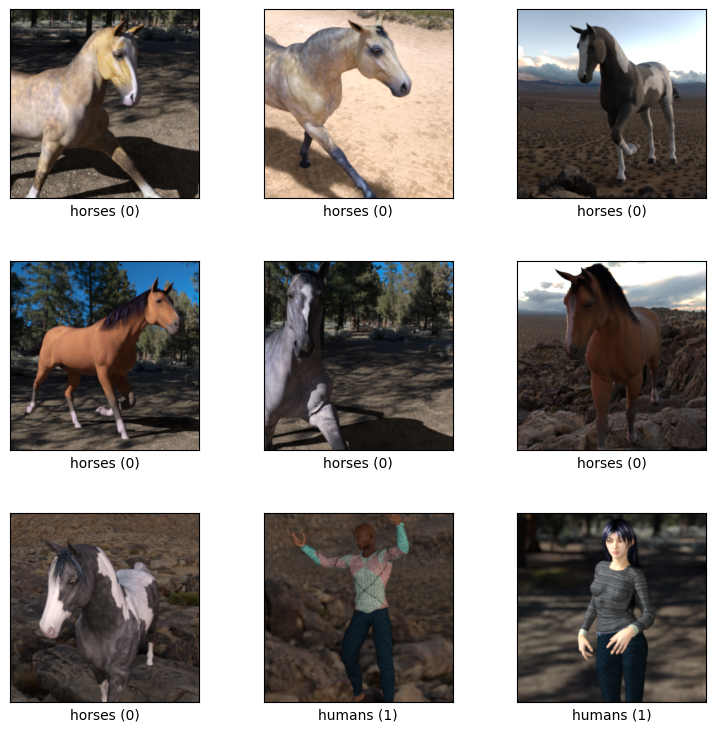

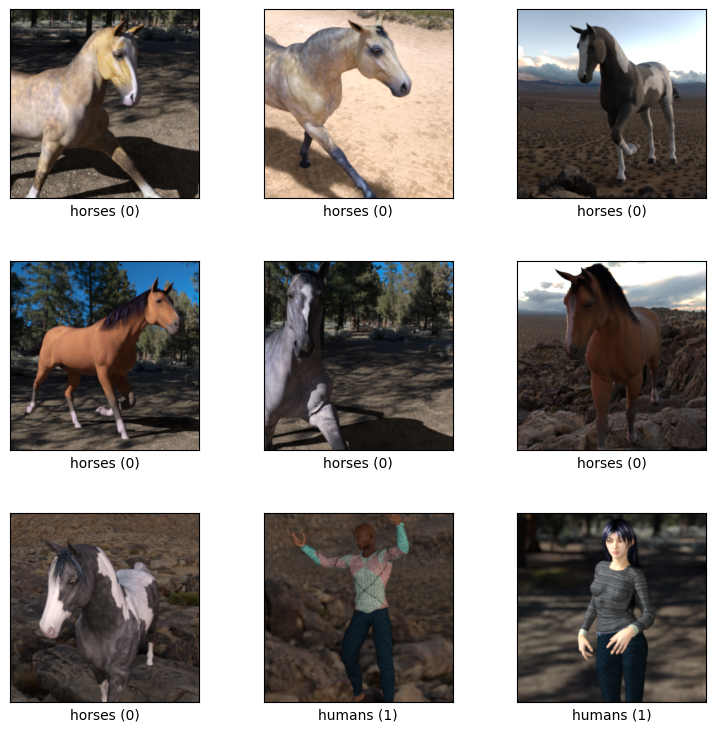

In [3]:
viz_data, ds_info = tfds.load(
    'horses_or_humans',
    split='train[:10]',
    shuffle_files=True,
    with_info=True)
tfds.visualization.show_examples(viz_data, ds_info)

## Extra Credit

For 3 points of extra credit, use TensorFlow's Keras preprocessing layers to create **synthetic training data**. To do this, you can, for example:
  - Create new records that rotate the original images a random number of degrees;
  - Create new records that mirror the original images left-to-right or top-to-bottom;
  - Create new records that partially crop the original images;
  - Create records that introduce noise to the original images;
  - etc.

  For more detail on how to do this, refer to the [Data Augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation) TensorFlow tutorial, and take a look at the [Image Super-Resolution](#scrollTo=aNGRuJahuk26) section of the final below.

## Model Building

Build a Convolutional Neural Network to classify each image as either a horse or a human.

Provide a narrative explanation of your choices to accompany any code. Your narrative should be substantive and enough for someone with little to no familiarity with CNNs to be able to understand what you are doing. By way of example, this should include discussion of what the major elements of a CNN are and what they do, as well as detail about your choices in parameters such as filter size and stride (or others as necessary).

In [34]:
#input layer with parameters 300, 300, 3
#300 = the pixels in the images, 3 = the parameter for rgb photos
input = tf.keras.layers.Input(shape=(300, 300, 3))

#convolutional layer that extracts 7 2x2 filters
#followed by a pooling layer using average pooling with a 2x2 window
#The pooling layer will report the average output in each window
#my choices for filter and window size ultimately came down to playing
#around with different numbers to see which would be best for the model
conv1 = tf.keras.layers.Conv2D(7, 2, activation = 'relu')(input)
pooling1 = tf.keras.layers.AveragePooling2D(2)(conv1)

#dropout layer, 40% of neurons will be set to 0 (randomly)
#60% are active
dropout1 = tf.keras.layers.Dropout(.4)(pooling1)

#second convolutional layer that extracts 70 2x2 filters
#followed again by a pooling layer using average pooling with a 2x2 window
conv2= tf.keras.layers.Conv2D(70, 2, activation = 'relu')(dropout1)
pooling2 = tf.keras.layers.AveragePooling2D(2)(conv2)

#another dropout layer with the same parameters as before
dropout2 = tf.keras.layers.Dropout(.4)(pooling2)

#flattening the feature map to a 1-demensional tensor
flatten = tf.keras.layers.Flatten()(dropout2)

#fully-connected dense layer with relu activation and 512 hidden units
dense = tf.keras.layers.Dense(512, activation = 'relu')(flatten)

#output layer with a single node and sigmoid activation
#I use sigmoid because it will map input to a value from 0 to 1
output = tf.keras.layers.Dense(1, activation = 'sigmoid')(dense)

#creating the mode; using the input feature map as the input,
#using the input feature map, conovlutional layers, pooling layers,
#dense layer, and output layer as the output
model = tf.keras.Model(input, output)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 299, 299, 7)       91        
                                                                 
 average_pooling2d (Average  (None, 149, 149, 7)       0         
 Pooling2D)                                                      
                                                                 
 dropout (Dropout)           (None, 149, 149, 7)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 70)      2030      
                                                                 
 average_pooling2d_1 (Avera  (None, 74, 74, 70)        0         
 gePooling2D)                                                

## Model Evaluation

After training your model, evaluate its performance. What metric(s) did you choose to optimize on? Would you say that your model performed well or poorly? How did you evaluate its performance to arrive at that conclusion?

Minimally, you should consider evaluating:
  - Your model's accuracy on the training and testing datasets;
  - Your model's loss over time as it trained;
  - A confusion matrix of your model's true and false positive and negative predictions; and
  - Holistically whether your model performs "well" enough for the classification task, and why or why not

In [6]:
#I chose to use binary crossentropy because there are only two options, horse or human
#I also use binary accuracy becasue it will calculate how often the predictions
#match the binary labels for horse and human
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['acc']
    )

In [7]:
history = model.fit(
    X_train,
    y_train,
    epochs = 15,
    validation_data = (X_test, y_test)
)

Epoch 1/15
33/33 [==============================] - 8s 107ms/step - loss: 1352.3774 - acc: 0.5579 - val_loss: 15.2096 - val_acc: 0.7227
Epoch 2/15
33/33 [==============================] - 3s 91ms/step - loss: 61.2360 - acc: 0.7585 - val_loss: 36.9730 - val_acc: 0.5000
Epoch 3/15
33/33 [==============================] - 3s 93ms/step - loss: 13.5432 - acc: 0.8384 - val_loss: 5.2655 - val_acc: 0.6055
Epoch 4/15
33/33 [==============================] - 3s 93ms/step - loss: 4.2256 - acc: 0.9182 - val_loss: 4.4999 - val_acc: 0.4844
Epoch 5/15
33/33 [==============================] - 3s 97ms/step - loss: 0.9941 - acc: 0.9464 - val_loss: 3.7850 - val_acc: 0.5078
Epoch 6/15
33/33 [==============================] - 3s 92ms/step - loss: 0.6541 - acc: 0.9513 - val_loss: 3.0016 - val_acc: 0.5547
Epoch 7/15
33/33 [==============================] - 3s 92ms/step - loss: 0.1829 - acc: 0.9786 - val_loss: 2.5210 - val_acc: 0.6133
Epoch 8/15
33/33 [==============================] - 3s 92ms/step - loss: 0.

8/8 [==============================] - 0s 16ms/step


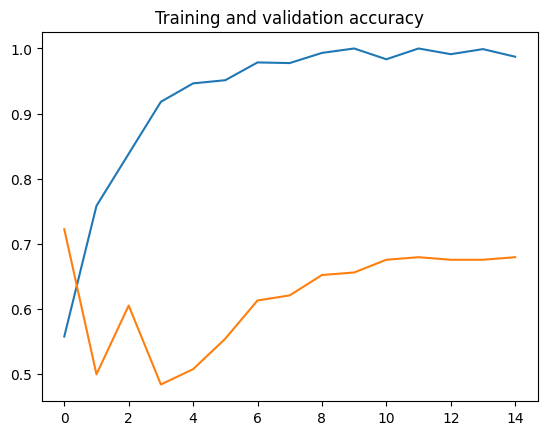

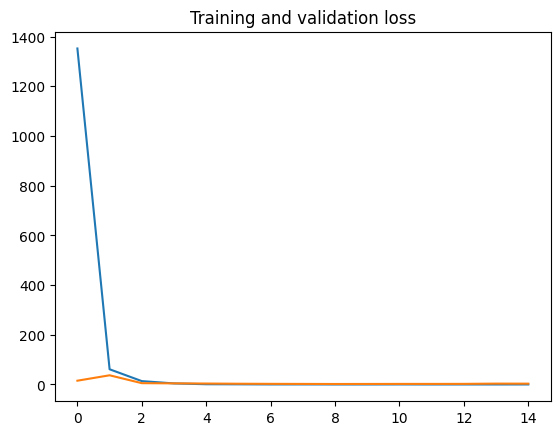

In [8]:
from sklearn.metrics import confusion_matrix
import numpy as np
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
_preds = [np.argmax(_pred) for _pred in model.predict(X_test)]

Overall my model seemed to perform very well. My accuracy kept getting better as my model trained and it was hovering around 1.000 by the end of training. My validation accuracy was improving through the first few epochs and then stalled out around 0.65 which isn't terrible but also isn't fantastic. My loss function dropped from over 1,000 all the way down to very close to 0 and, while my validation loss certainly improved throughout training, it didn't drop as low as my other loss function. Holistically I would say that my model performed very well and I am happy with its results.

-----

<a id="scrollTo=aNGRuJahuk26"></a>

# Image Super-Resolution

> **NOTE:** This section of the final is **optional**. If you choose to complete it, it will contribute to both the "Model Building" and "Model Evaluation" portions of the grading rubric in addition to the image classifier you have already built. This will mean that grading is more lenient; however, you will have to do additional work. There is no penalty for choosing to not complete this section.

For this task, you will build an autoencoder that takes an image and creates a super-resolution version of that image. I.e., it _upscales_ the image to fill in more detail than was originally present.

To build this model, we will use the same dataset as in the previous example; however, with a small twist. Your training data will be images of horses and humans that have been downsampled to 150x150 pixels, and your model output will be the **exact same** images, but at the original 300x300 pixel resolution. To help get started, I have prepared a training and testing dataset of these images for you:

In [9]:
resize_and_rescale = tf.keras.Sequential([
  tf.keras.layers.Resizing(150, 150),
  tf.keras.layers.Resizing(300, 300),
  tf.keras.layers.Rescaling(1./255)
])

X_train_2 = resize_and_rescale(X_train, training=True)
X_test_2 = resize_and_rescale(X_test, training=True)

As we can see, the image on the right is the one we have downscaled and it shows an obvious loss of detail compared to the original on the left. Let's see if our supersampling autoencoder is able to clear up the image resolution!

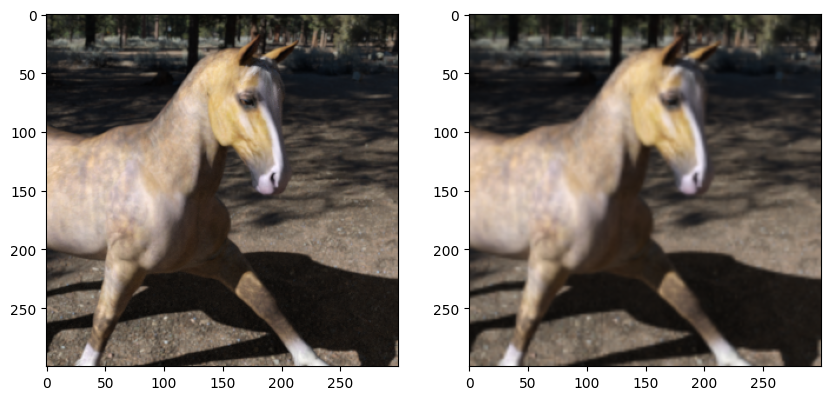

In [10]:
orig_img = next(iter(X_train))
downscaled_img = next(iter(X_train_2))

plt.figure(figsize=(10, 10))

ax = plt.subplot(1, 2, 1)
plt.imshow(orig_img)

ax = plt.subplot(1, 2, 2)
plt.imshow(downscaled_img)

Finally, we will also create new y variables for our model to use as a ground truth against which to compare its predictions. These will just be the original 300x300 pixel images:

In [11]:
# Instead of "horse" or "human" labels,
# our y variable will now be the original
# 300x300 pixel images
y_train_2 = X_train
y_test_2 = X_test

You should reference our [Autoencoders Lab](https://github.com/wetherc/data-2000/blob/main/labs/11-16_autoencoders.ipynb) for guidance on how to structure your model. Importantly, remember:

  - Your model's input should have a shape that matches the input's pixel size (300x300 pixels --- remember, we downscaled the images and then stretched them back to their original dimensions);
  - Your model's output should have a shape that matches the output's pixel size (300x300 pixels);
  - Your convolutional and deconvolutional layers should be careful to evenly divide your images so that you don't have rounding issues from fractional pixels;
  - For your model's final layer, you should use TensorFlow's [UpSampling2D layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/UpSampling2D) followed by one or more Convolutional2D layers

## Model Building

Build a Convolutional Neural Network to classify each image as either a horse or a human.

Provide a narrative explanation of your choices to accompany any code. Your narrative should be substantive and enough for someone with little to no familiarity with CNNs to be able to understand what you are doing. By way of example, this should include discussion of what the major elements of a CNN are and what they do, as well as detail about your choices in parameters such as filter size and stride (or others as necessary).

In [26]:
#input layer of 300x300 pixels, 3 = rgb parameter
img_input = tf.keras.layers.Input(shape=(300, 300, 3))

#encoder layers with relu activation, moving 2 then 3 pixels for each new window
encoder = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2)(img_input)
encoder = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=3)(encoder)

In [27]:
decoder = tf.keras.layers.Conv2DTranspose(32, 3, activation='relu', padding='same', strides=3)(encoder)
# decoder = tf.keras.layers.UpSampling2D(size = (1,1))(decoder)
decoder = tf.keras.layers.Conv2DTranspose(16, 3, activation='relu', padding='same', strides=2)(decoder)

output = tf.keras.layers.Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same')(decoder)

In [29]:
autoencoder = tf.keras.Model(img_input, output)

autoencoder.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.MeanSquaredError()
)

In [30]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 conv2d_9 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 conv2d_transpose_8 (Conv2D  (None, 150, 150, 32)      9248      
 Transpose)                                                      
                                                                 
 conv2d_transpose_9 (Conv2D  (None, 300, 300, 16)      4624      
 Transpose)                                                      
                                                                 
 conv2d_10 (Conv2D)          (None, 300, 300, 3)       435 

## Model Evaluation

After training your model, evaluate its performance. What metric(s) did you choose to optimize on? Would you say that your model performed well or poorly? How did you evaluate its performance to arrive at that conclusion?

Minimally, you should consider evaluating:
  - Your model's accuracy on the training and testing datasets;
  - Your model's loss over time as it trained;
  - A visual comparison of your upsampled predicted images and the original 300x300 pixel images;
  - Holistically whether your model performs "well" enough for the classification task, and why or why not

In [31]:
history = autoencoder.fit(
    X_train_2,
    y_train_2,
    epochs=15,
    validation_data = (X_test_2, y_test_2)
    )

Epoch 1/15
33/33 [==============================] - 11s 131ms/step - loss: 22581.5254 - val_loss: 53846.5078
Epoch 2/15
33/33 [==============================] - 3s 100ms/step - loss: 22499.5371 - val_loss: 53846.2031
Epoch 3/15
33/33 [==============================] - 3s 102ms/step - loss: 22499.4141 - val_loss: 53846.2031
Epoch 4/15
33/33 [==============================] - 4s 110ms/step - loss: 22499.4141 - val_loss: 53846.2031
Epoch 5/15
33/33 [==============================] - 3s 101ms/step - loss: 22499.4141 - val_loss: 53846.2031
Epoch 6/15
33/33 [==============================] - 4s 109ms/step - loss: 22499.4180 - val_loss: 53846.2031
Epoch 7/15
33/33 [==============================] - 4s 111ms/step - loss: 22499.4102 - val_loss: 53846.2031
Epoch 8/15
33/33 [==============================] - 4s 113ms/step - loss: 22499.4160 - val_loss: 53846.2031
Epoch 9/15
33/33 [==============================] - 4s 108ms/step - loss: 22499.4141 - val_loss: 53846.2031
Epoch 10/15
33/33 [========

My model did not perform well at all but at least it gave some sort of output. In all honestly I was out of town for basketball the day we went over autoencoders so I don't know them too well but at least I gave it a shot.